In [1]:
import pandas as pd

# 读取情绪特征数据
emotion_features = pd.read_csv(r'result\machine_learning\merged_emotion_features.csv')
emotion_features = emotion_features.rename(columns={'Person': '姓名'})
emotion_features = emotion_features.rename(columns={'组别': 'group'})


In [2]:
# 读取各个情绪下的AU强度数据
emotions = ['neutral', 'happy', 'sad', 'surprise', 'anger']
all_dfs = {}

for emotion in emotions:
    file_path = f"result/AU_Analysis/au_intensities_{emotion}.csv"
    df = pd.read_csv(file_path)
    
    # 重命名列，添加情绪后缀
    rename_cols = {col: f"{col[:-2]}_intensity_{emotion}" for col in df.columns if col not in ['姓名', 'group']}
    df = df.rename(columns=rename_cols)
    all_dfs[emotion] = df

# 从第一个DataFrame开始合并
merged_df = all_dfs[emotions[0]]

# 依次合并其他情绪的数据
for emotion in emotions[1:]:
    merged_df = pd.merge(merged_df, all_dfs[emotion], 
                        on='姓名', 
                        how='outer',
                        suffixes=('', f'_{emotion}'))

# 保留一个group列
group_cols = [col for col in merged_df.columns if col.startswith('group')]
merged_df['group'] = merged_df[group_cols[0]]

merged_df = merged_df.drop([col for col in group_cols if col != 'group'], axis=1)

demographics = pd.read_csv(r'result\demographics.csv')
selected_cols = ['姓名', 'ABC', 'S1', 'R', 'B', 'L', 'S2', '克氏', 'Age']
demographics_selected = demographics[selected_cols]


AU_intensity_features = pd.merge(merged_df, demographics_selected, on='姓名', how='left')

In [3]:
# 读取各情绪下AU相关性特征
emotions = ['neutral', 'happy', 'sad', 'surprise', 'anger']
all_dfs = {}

for emotion in emotions:
    file_path = f"result/AU_Analysis/au_intensity_correlations_{emotion}.csv"
    df = pd.read_csv(file_path)
    
    # 重命名列，添加情绪后缀
    rename_cols = {col: f"{col[:-5]}_correlation_{emotion}" for col in df.columns if col not in ['姓名', 'group']}
    df = df.rename(columns=rename_cols)
    all_dfs[emotion] = df

# 从第一个DataFrame开始合并
merged_df = all_dfs[emotions[0]]

# 依次合并其他情绪的数据
for emotion in emotions[1:]:
    merged_df = pd.merge(merged_df, all_dfs[emotion], 
                        on='姓名', 
                        how='outer',
                        suffixes=('', f'_{emotion}'))

# 保留一个group列
group_cols = [col for col in merged_df.columns if col.startswith('group')]
merged_df['group'] = merged_df[group_cols[0]]

merged_df = merged_df.drop([col for col in group_cols if col != 'group'], axis=1)

demographics = pd.read_csv(r'result\demographics.csv')
selected_cols = ['姓名', 'ABC', 'S1', 'R', 'B', 'L', 'S2', '克氏', 'Age']
demographics_selected = demographics[selected_cols]


AU_correlation_features = pd.merge(merged_df, demographics_selected, on='姓名', how='left')

In [4]:
# 合并数据
# 1. 情绪+AU强度 E-I
fusion_emotions_AU_intensity_features = pd.merge(emotion_features, AU_intensity_features, on='姓名', how='left')
# 找出重复的列（除了'姓名'列）
duplicate_cols = []
for col in fusion_emotions_AU_intensity_features.columns:
    if col.endswith('_x') or col.endswith('_y'):
        base_col = col[:-2]  # 移除 '_x' 或 '_y' 后缀
        if base_col + '_x' in fusion_emotions_AU_intensity_features.columns and \
           base_col + '_y' in fusion_emotions_AU_intensity_features.columns:
            duplicate_cols.append(base_col)
# 保留_x列，删除_y列
cols_to_drop = [col + '_y' for col in duplicate_cols]
fusion_emotions_AU_intensity_features = fusion_emotions_AU_intensity_features.drop(columns=cols_to_drop)
# 重命名_x列，去掉后缀
rename_dict = {col + '_x': col for col in duplicate_cols}
fusion_emotions_AU_intensity_features = fusion_emotions_AU_intensity_features.rename(columns=rename_dict)

# 2. 情绪+AU相关性  E-C
fusion_emotions_AU_correlation_features = pd.merge(emotion_features, AU_correlation_features, on='姓名', how='left')
# 找出重复的列（除了'姓名'列）
duplicate_cols = []
for col in fusion_emotions_AU_correlation_features.columns:
    if col.endswith('_x') or col.endswith('_y'):
        base_col = col[:-2]  # 移除 '_x' 或 '_y' 后缀
        if base_col + '_x' in fusion_emotions_AU_correlation_features.columns and \
           base_col + '_y' in fusion_emotions_AU_correlation_features.columns:
            duplicate_cols.append(base_col)
# 保留_x列，删除_y列
cols_to_drop = [col + '_y' for col in duplicate_cols]
fusion_emotions_AU_correlation_features = fusion_emotions_AU_correlation_features.drop(columns=cols_to_drop)
# 重命名_x列，去掉后缀
rename_dict = {col + '_x': col for col in duplicate_cols}
fusion_emotions_AU_correlation_features = fusion_emotions_AU_correlation_features.rename(columns=rename_dict)

# 3. AU强度+AU相关性  I-C
fusion_AU_intensity_correlation_features = pd.merge(AU_intensity_features, AU_correlation_features, on='姓名', how='left')
# 找出重复的列（除了'姓名'列）
duplicate_cols = []
for col in fusion_AU_intensity_correlation_features.columns:
    if col.endswith('_x') or col.endswith('_y'):
        base_col = col[:-2]  # 移除 '_x' 或 '_y' 后缀
        if base_col + '_x' in fusion_AU_intensity_correlation_features.columns and \
           base_col + '_y' in fusion_AU_intensity_correlation_features.columns:
            duplicate_cols.append(base_col)
# 保留_x列，删除_y列
cols_to_drop = [col + '_y' for col in duplicate_cols]
fusion_AU_intensity_correlation_features = fusion_AU_intensity_correlation_features.drop(columns=cols_to_drop)
# 重命名_x列，去掉后缀
rename_dict = {col + '_x': col for col in duplicate_cols}
fusion_AU_intensity_correlation_features = fusion_AU_intensity_correlation_features.rename(columns=rename_dict)


# 4. 情绪+AU强度+AU相关性
fusion_emotions_AU_intensity_correlation_features = pd.merge(fusion_emotions_AU_intensity_features, AU_correlation_features, on='姓名', how='left')
# 找出重复的列（除了'姓名'列）
duplicate_cols = []
for col in fusion_emotions_AU_intensity_correlation_features.columns:
    if col.endswith('_x') or col.endswith('_y'):
        base_col = col[:-2]  # 移除 '_x' 或 '_y' 后缀
        if base_col + '_x' in fusion_emotions_AU_intensity_correlation_features.columns and \
           base_col + '_y' in fusion_emotions_AU_intensity_correlation_features.columns:
            duplicate_cols.append(base_col)
# 保留_x列，删除_y列
cols_to_drop = [col + '_y' for col in duplicate_cols]
fusion_emotions_AU_intensity_correlation_features = fusion_emotions_AU_intensity_correlation_features.drop(columns=cols_to_drop)
# 重命名_x列，去掉后缀
rename_dict = {col + '_x': col for col in duplicate_cols}
fusion_emotions_AU_intensity_correlation_features = fusion_emotions_AU_intensity_correlation_features.rename(columns=rename_dict)

# ABC


Feature Type         Model                   R2        MAE       RMSE
----------------------------------------------------------------------------------------------------
Emotion Features     Ridge                0.157      17.76      23.13 

Feature Type         Model                   R2        MAE       RMSE
----------------------------------------------------------------------------------------------------
Fusion E-I           Ridge                0.351      14.79      20.29 

Feature Type         Model                   R2        MAE       RMSE
----------------------------------------------------------------------------------------------------
Fusion E-C           Ridge                0.355      14.74      20.22 

Feature Type         Model                   R2        MAE       RMSE
----------------------------------------------------------------------------------------------------
Fusion I-C           Ridge                0.396      14.50      19.57 

Feature Type         Model 

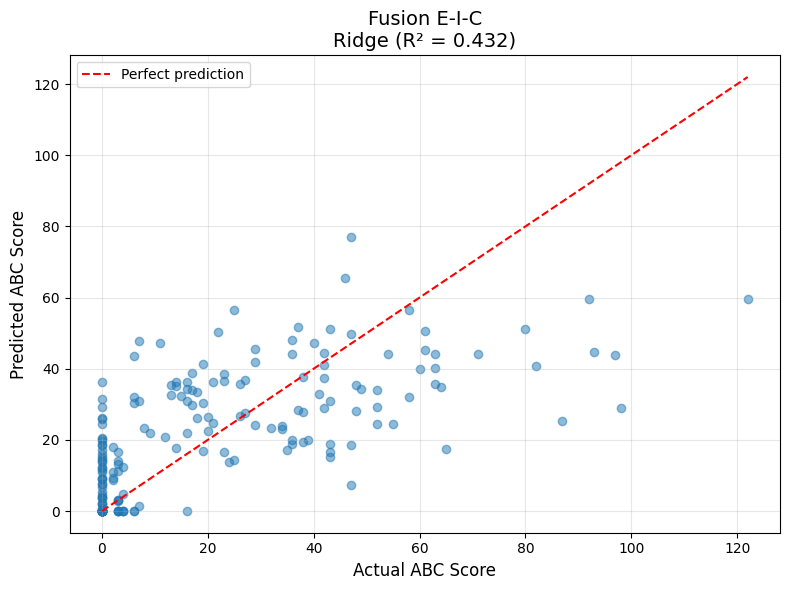

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import os

# 定义特征集
feature_sets = [
    (emotion_features, 'Emotion Features'),
    (fusion_emotions_AU_intensity_features, 'Fusion E-I'),
    (fusion_emotions_AU_correlation_features, 'Fusion E-C'),
    (fusion_AU_intensity_correlation_features, 'Fusion I-C'),
    (fusion_emotions_AU_intensity_correlation_features, 'Fusion E-I-C')
]

# 设置PCA降维维度
n_components = 20

# 创建单个散点图用于Fusion E-I-C
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# 存储所有结果
results_list = []
writer = pd.ExcelWriter('result/classify/regression_scatter_data_CABS_final.xlsx', engine='openpyxl')


for idx, (features, feature_type) in enumerate(feature_sets):

    feature_cols = [col for col in features.columns if '_' in col]
    X = features[feature_cols]
    X = X.fillna(X.mean())
    y = features['ABC']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    
    # 定义模型
    models = [
        ('Ridge', Ridge(
            alpha=30.0,           # 正则化强度，越大表示正则化越强  CABS 30  ABC100
            fit_intercept=True,  # 是否计算截距
            random_state=42,     # 随机数种子
            solver='auto',        # 求解器类型
        )),
    ]
    
    print("\n" + "="*100)
    print(f"{'Feature Type':<20} {'Model':<15} {'R2':>10} {'MAE':>10} {'RMSE':>10}")
    print("-"*100)

    for model_idx, (model_name, model) in enumerate(models):
        all_y_test = []
        all_y_pred = []
        fold_r2_scores = []
        
        # K折交叉验证
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        for fold, (train_idx, test_idx) in enumerate(kf.split(X_pca), 1):
            X_train, X_test = X_pca[train_idx], X_pca[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # 将负数预测值置为0
            y_pred = np.maximum(y_pred, 0)
            
            all_y_test.extend(y_test)
            all_y_pred.extend(y_pred)
            fold_r2_scores.append(r2_score(y_test, y_pred))
        
        # 计算评估指标
        mae = mean_absolute_error(all_y_test, all_y_pred)
        rmse = np.sqrt(mean_squared_error(all_y_test, all_y_pred))
        r2 = r2_score(all_y_test, all_y_pred)
        
        # 只绘制Fusion E-I-C的散点图
        if feature_type == 'Fusion E-I-C':
            ax.scatter(all_y_test, all_y_pred, alpha=0.5)
            
            # 添加对角线
            min_val = min(min(all_y_test), min(all_y_pred))
            max_val = max(max(all_y_test), max(all_y_pred))
            ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect prediction')
            
            # 设置标题和标签
            ax.set_title(f'{feature_type}\n{model_name} (R² = {r2:.3f})', fontsize=14)
            ax.set_xlabel('Actual ABC Score', fontsize=12)
            ax.set_ylabel('Predicted ABC Score', fontsize=12)
            ax.grid(True, alpha=0.3)
            ax.legend(fontsize=10)

        # 保存散点数据到Excel
        sheet_name = f"{feature_type.replace(' ', '_')}_{model_name}"
        scatter_df = pd.DataFrame({
            'Actual_ABC': all_y_test,
            'Predicted_ABC': all_y_pred
        })
        scatter_df.to_excel(writer, sheet_name=sheet_name, index=False)
 
        
        # 打印表格行
        print(f"{feature_type:<20} {model_name:<15} {r2:>10.3f} {mae:>10.2f} {rmse:>10.2f} ")

        
        # 保存结果
        results_list.append({
            'Feature_Type': feature_type,
            'Model': model_name,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2,
            'R2_Mean': np.mean(fold_r2_scores),
            'R2_Std': np.std(fold_r2_scores)
        })

writer.close()

plt.tight_layout()
plt.show()


# CABS


Feature Type         Model                   R2        MAE       RMSE
----------------------------------------------------------------------------------------------------
Emotion Features     Ridge                0.145       4.60       5.82 

Feature Type         Model                   R2        MAE       RMSE
----------------------------------------------------------------------------------------------------
Fusion E-I           Ridge                0.320       4.02       5.19 

Feature Type         Model                   R2        MAE       RMSE
----------------------------------------------------------------------------------------------------
Fusion E-C           Ridge                0.358       4.01       5.05 

Feature Type         Model                   R2        MAE       RMSE
----------------------------------------------------------------------------------------------------
Fusion I-C           Ridge                0.371       3.94       4.99 

Feature Type         Model 

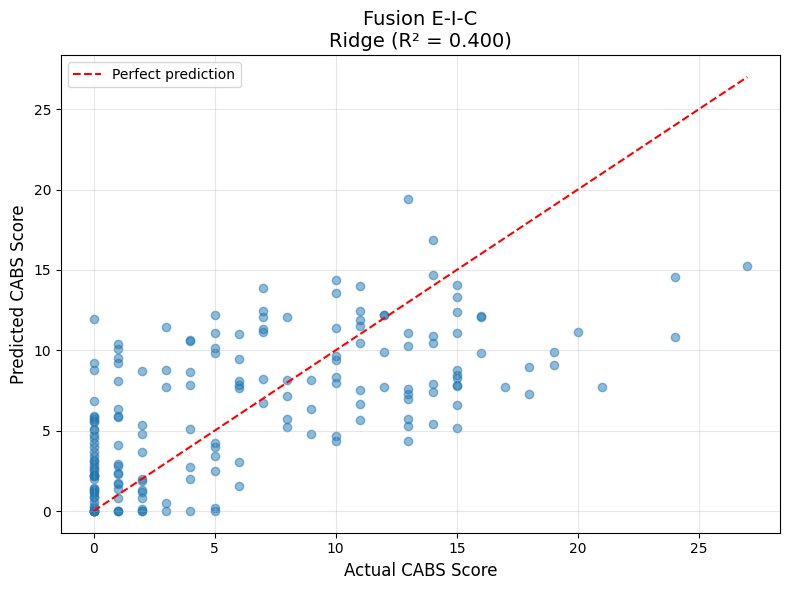

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import os

# 定义特征集
feature_sets = [
    (emotion_features, 'Emotion Features'),
    (fusion_emotions_AU_intensity_features, 'Fusion E-I'),
    (fusion_emotions_AU_correlation_features, 'Fusion E-C'),
    (fusion_AU_intensity_correlation_features, 'Fusion I-C'),
    (fusion_emotions_AU_intensity_correlation_features, 'Fusion E-I-C')
]

# 设置PCA降维维度
n_components = 20

# 创建单个散点图用于Fusion E-I-C
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# 存储所有结果
results_list = []
writer = pd.ExcelWriter('result/classify/regression_scatter_data_CABS_final.xlsx', engine='openpyxl')


for idx, (features, feature_type) in enumerate(feature_sets):

    feature_cols = [col for col in features.columns if '_' in col]
    X = features[feature_cols]
    X = X.fillna(X.mean())
    y = features['克氏']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    
    # 定义模型
    models = [
        ('Ridge', Ridge(
            alpha=30.0,           # 正则化强度，越大表示正则化越强  CABS 30  ABC100
            fit_intercept=True,  # 是否计算截距
            random_state=42,     # 随机数种子
            solver='auto',        # 求解器类型
        )),
    ]
    
    print("\n" + "="*100)
    print(f"{'Feature Type':<20} {'Model':<15} {'R2':>10} {'MAE':>10} {'RMSE':>10}")
    print("-"*100)

    for model_idx, (model_name, model) in enumerate(models):
        all_y_test = []
        all_y_pred = []
        fold_r2_scores = []
        
        # K折交叉验证
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        for fold, (train_idx, test_idx) in enumerate(kf.split(X_pca), 1):
            X_train, X_test = X_pca[train_idx], X_pca[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # 将负数预测值置为0
            y_pred = np.maximum(y_pred, 0)
            
            all_y_test.extend(y_test)
            all_y_pred.extend(y_pred)
            fold_r2_scores.append(r2_score(y_test, y_pred))
        
        # 计算评估指标
        mae = mean_absolute_error(all_y_test, all_y_pred)
        rmse = np.sqrt(mean_squared_error(all_y_test, all_y_pred))
        r2 = r2_score(all_y_test, all_y_pred)
        
        # 只绘制Fusion E-I-C的散点图
        if feature_type == 'Fusion E-I-C':
            ax.scatter(all_y_test, all_y_pred, alpha=0.5)
            
            # 添加对角线
            min_val = min(min(all_y_test), min(all_y_pred))
            max_val = max(max(all_y_test), max(all_y_pred))
            ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect prediction')
            
            # 设置标题和标签
            ax.set_title(f'{feature_type}\n{model_name} (R² = {r2:.3f})', fontsize=14)
            ax.set_xlabel('Actual CABS Score', fontsize=12)
            ax.set_ylabel('Predicted CABS Score', fontsize=12)
            ax.grid(True, alpha=0.3)
            ax.legend(fontsize=10)

        # 保存散点数据到Excel
        sheet_name = f"{feature_type.replace(' ', '_')}_{model_name}"
        scatter_df = pd.DataFrame({
            'Actual_CABS': all_y_test,
            'Predicted_CABS': all_y_pred
        })
        scatter_df.to_excel(writer, sheet_name=sheet_name, index=False)
 
        
        # 打印表格行
        print(f"{feature_type:<20} {model_name:<15} {r2:>10.3f} {mae:>10.2f} {rmse:>10.2f} ")

        
        # 保存结果
        results_list.append({
            'Feature_Type': feature_type,
            'Model': model_name,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2,
            'R2_Mean': np.mean(fold_r2_scores),
            'R2_Std': np.std(fold_r2_scores)
        })

writer.close()

plt.tight_layout()
plt.show()
